In [1]:
import numpy as np
import pandas as pd
import os
import sys

parent_dir = os.path.dirname(os.path.realpath('../lhs'))

# Add the parent directory to sys.path
sys.path.append(parent_dir)
import lhs

parent_dir = os.path.dirname(os.path.realpath('../spatial_plot'))

# Add the parent directory to sys.path
sys.path.append(parent_dir)
import spatial_plot
import matplotlib.pyplot as plt

In [3]:
df = pd.read_pickle('../../emit_data')
print(df.shape)
df.head()

(22886, 13)


,elev med,zen,slope,wv range,wv med,total cloud fraction,lat,lon,fid,date,time,orbit,scene
0,3.22,36.97,7.65,4.78,1.52,0.10,90.483704,37.149964,emit20220810t034648_o22203_s001,20220810,034648,22203,001
1,2.23,36.66,3.77,0.66,1.79,0.02,91.182553,37.631332,emit20220810t034700_o22203_s001,20220810,034700,22203,001
2,2.06,36.37,1.51,0.40,1.71,0.03,91.891301,38.106329,emit20220810t034712_o22203_s001,20220810,034712,22203,001
3,2.08,36.08,2.58,1.04,1.64,0.03,92.610548,38.577816,emit20220810t034724_o22203_s001,20220810,034724,22203,001
4,2.31,35.81,14.88,4.74,1.81,0.00,93.339586,39.044287,emit20220810t034735_o22203_s001,20220810,034735,22203,001


In [5]:
samples = lhs.LatinHypercubeSample_wvmed_sza(df, 25, 2)
lhs_samples = df.iloc[samples]
lhs_fids = lhs_samples['fid']
print(lhs_samples.shape)
lhs_samples.head()

(925, 13)


,elev med,zen,slope,wv range,wv med,total cloud fraction,lat,lon,fid,date,time,orbit,scene
17674,4.74,8.76,15.60,0.19,0.11,0.33,86.641533,29.134147,emit20230601t062907_o15205_s000,20230601,062907,15205,000
21179,4.74,11.13,17.64,0.33,0.25,0.05,79.109782,34.163247,emit20230623t062332_o17404_s003,20230623,062332,17404,003
18219,4.74,13.19,11.56,0.23,0.20,0.13,82.836319,30.258020,emit20230604t053907_o15504_s000,20230604,053907,15504,000
18360,2.13,13.62,0.00,0.80,0.22,0.37,14.575833,32.466152,emit20230604t101823_o15507_s000,20230604,101823,15507,000
3834,2.41,17.15,25.74,0.87,0.25,0.03,-70.372915,-29.356078,emit20230119t175554_o01911_s002,20230119,175554,01911,002


C:\Users\vpatro\Desktop\scene_analysis\spatial_plot.py:41: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


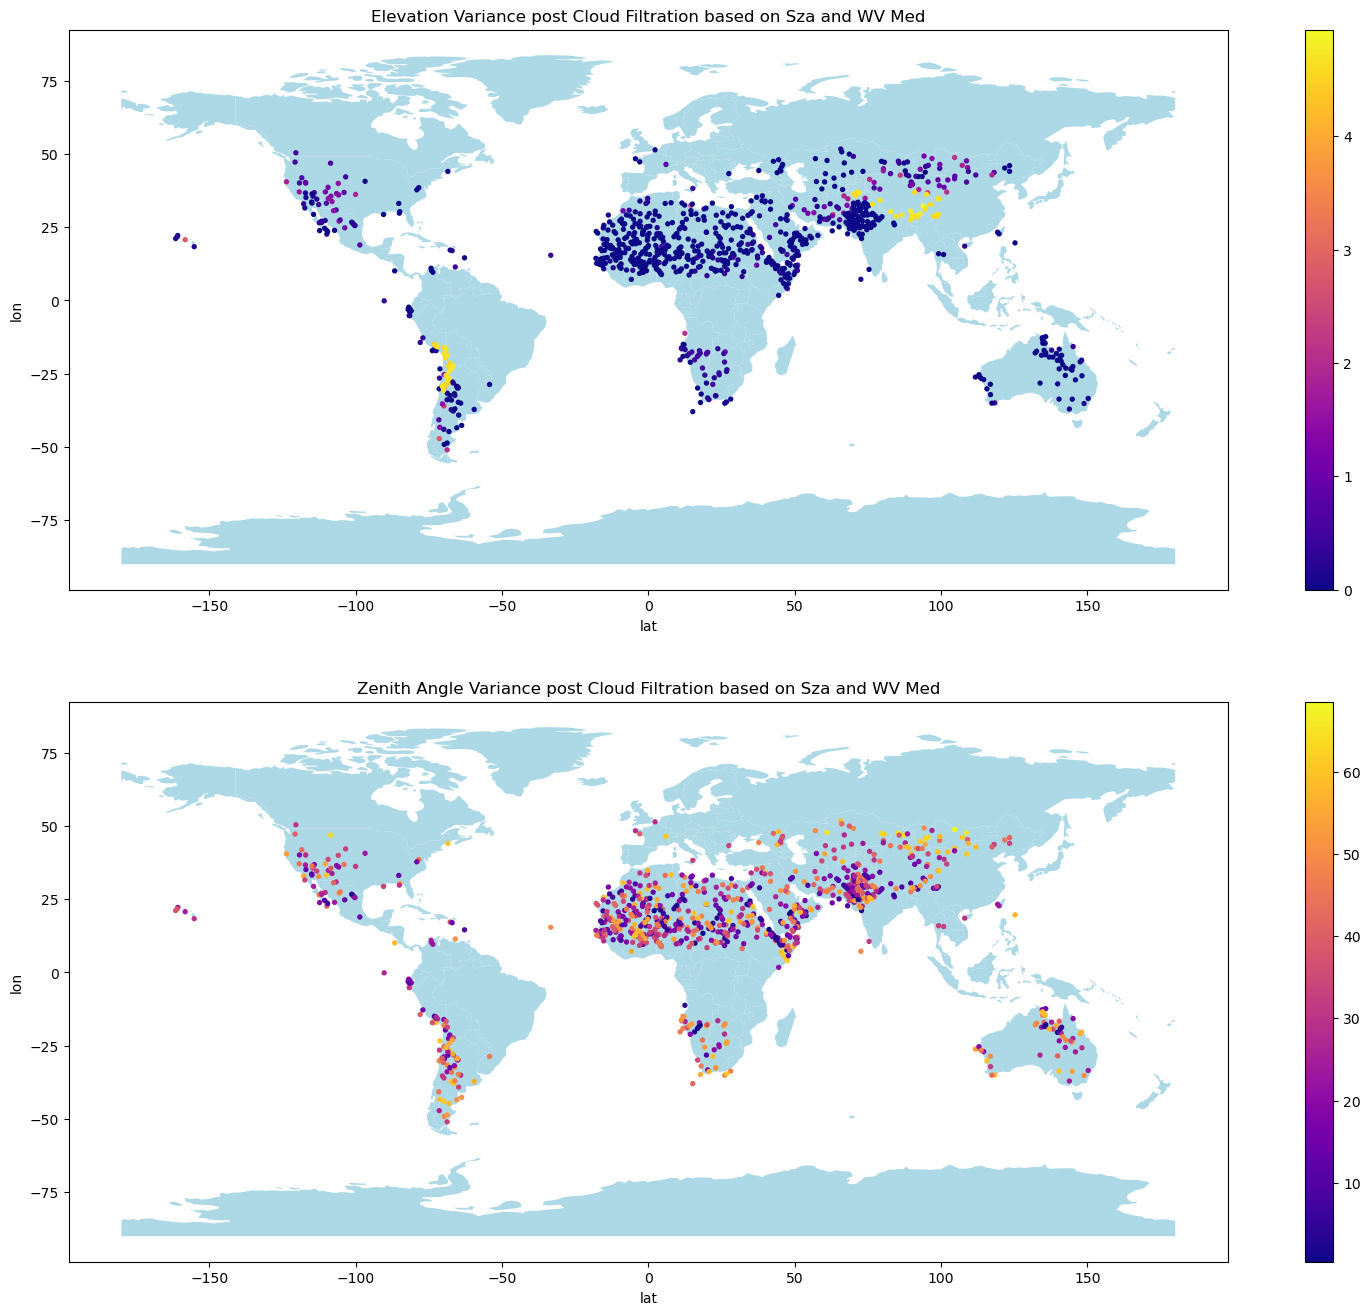

In [6]:
spatial_plot.elev_zen_variance_plt(lhs_samples, ' Sza and WV Med')

C:\Users\vpatro\Desktop\scene_analysis\spatial_plot.py:55: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


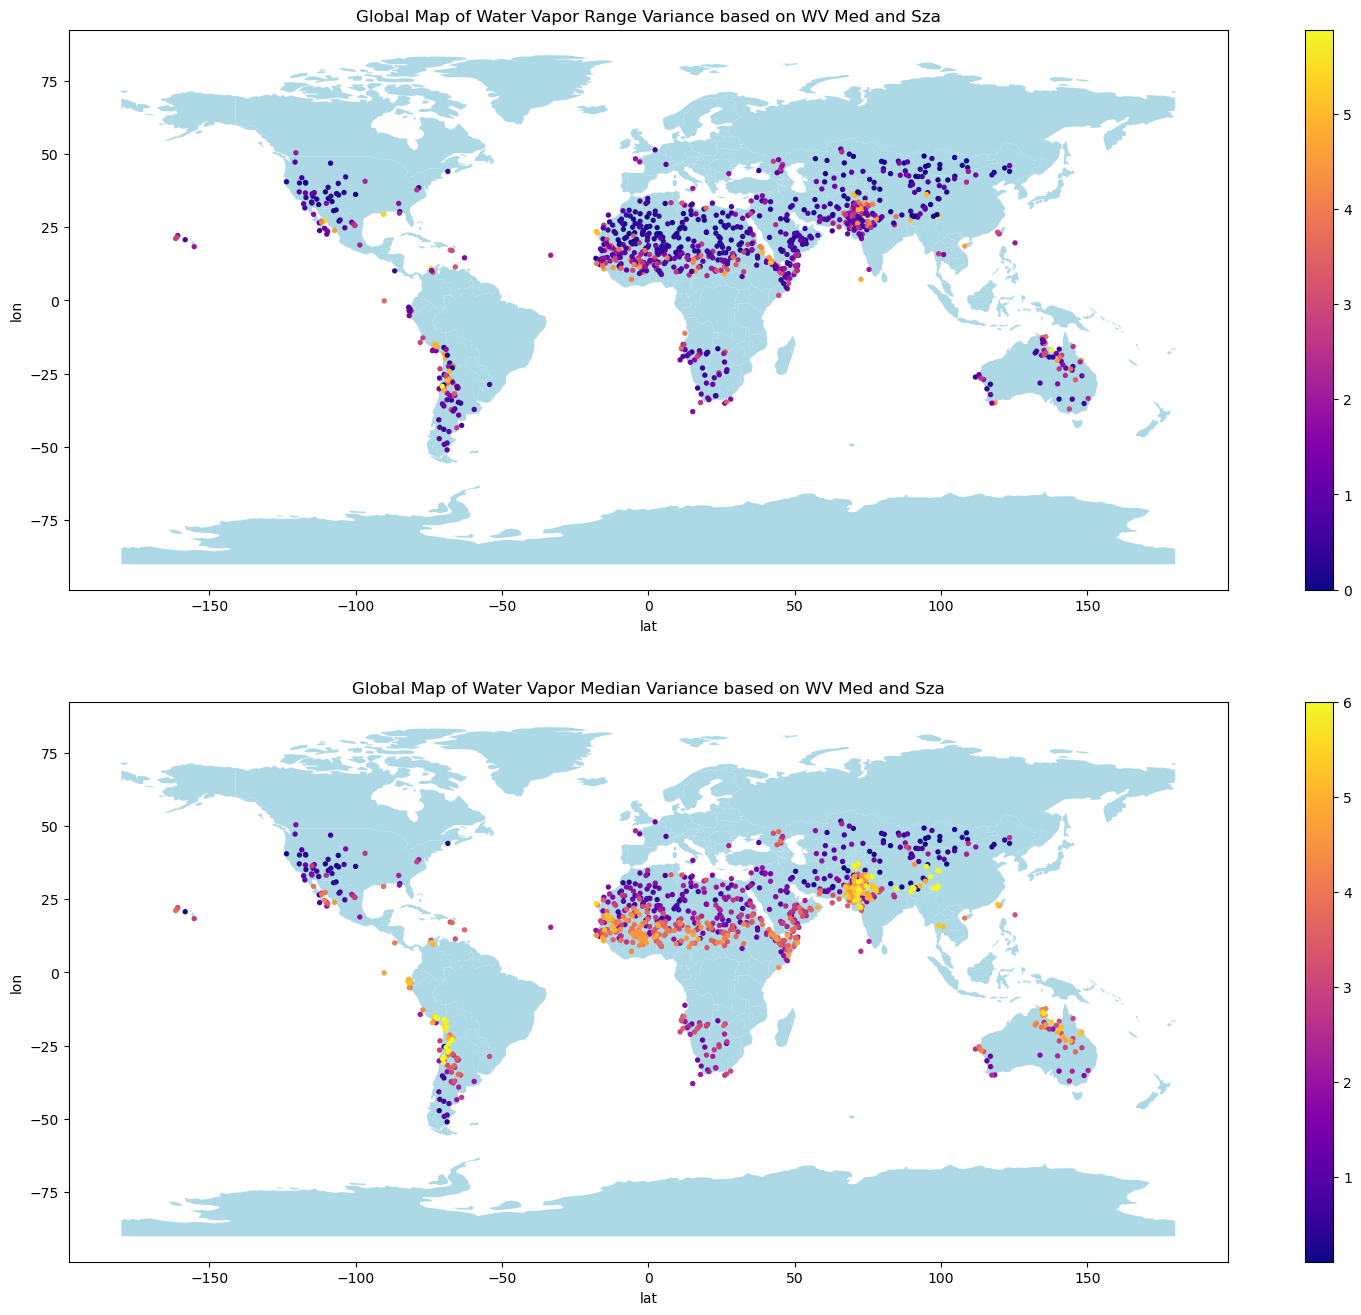

In [7]:
spatial_plot.wv_range_med_variance_plt(lhs_samples, ' WV Med and Sza')

Text(0.5, 0, 'WV Med (g/cm^2)')

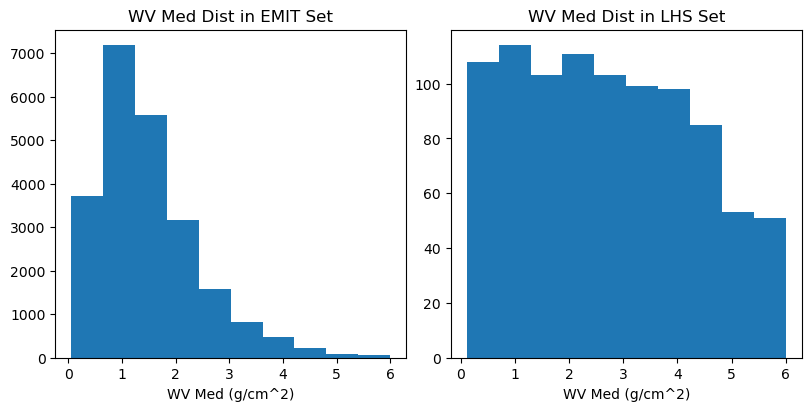

In [8]:
fig, axs = plt.subplots(1, 2, figsize = (8, 4), constrained_layout = True)

axs[0].hist(df['wv med'])
axs[0].set_title('WV Med Dist in EMIT Set')
axs[0].set_xlabel('WV Med (g/cm^2)')

axs[1].hist(lhs_samples['wv med'])
axs[1].set_title('WV Med Dist in LHS Set')
axs[1].set_xlabel('WV Med (g/cm^2)')


Text(0.5, 0, 'WVR (g/cm^2)')

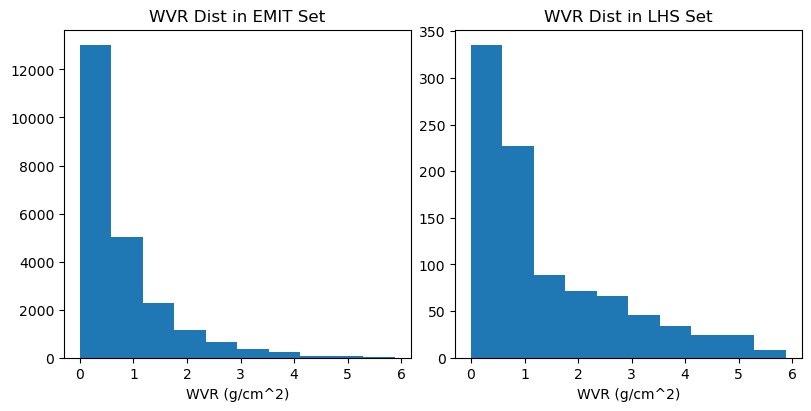

In [9]:
fig, axs = plt.subplots(1, 2, figsize = (8, 4), constrained_layout = True)

axs[0].hist(df['wv range'])
axs[0].set_title('WVR Dist in EMIT Set')
axs[0].set_xlabel('WVR (g/cm^2)')

axs[1].hist(lhs_samples['wv range'])
axs[1].set_title('WVR Dist in LHS Set')
axs[1].set_xlabel('WVR (g/cm^2)')


Text(0, 0.5, 'WV Med (g/cm^2)')

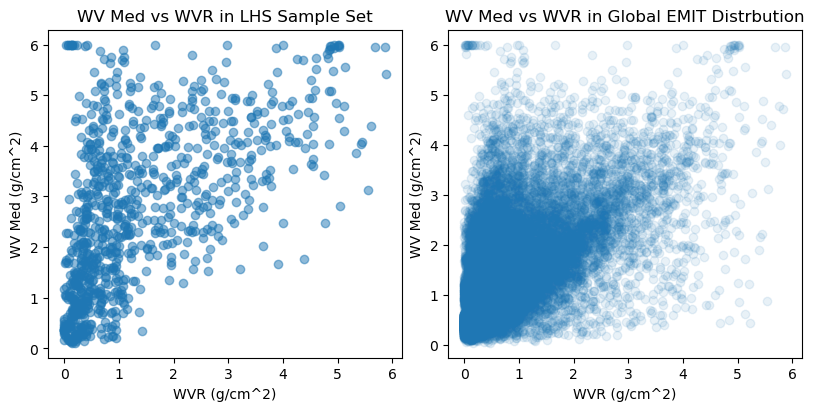

In [11]:
fig, axs = plt.subplots(1, 2, figsize = (8, 4), constrained_layout = True)

axs[0].scatter(lhs_samples['wv range'], lhs_samples['wv med'], alpha = 0.5)
axs[0].set_title('WV Med vs WVR in LHS Sample Set')
axs[0].set_xlabel('WVR (g/cm^2)')
axs[0].set_ylabel('WV Med (g/cm^2)')

axs[1].scatter(df['wv range'], df['wv med'], alpha = 0.1)
axs[1].set_title('WV Med vs WVR in Global EMIT Distrbution')
axs[1].set_xlabel('WVR (g/cm^2)')
axs[1].set_ylabel('WV Med (g/cm^2)')



Text(0.5, 1.0, 'LHS Set Scatter')

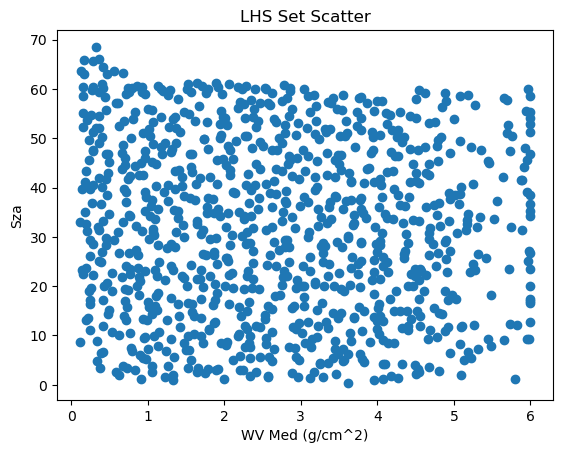

In [13]:
plt.scatter(lhs_samples['wv med'], lhs_samples['zen'])
plt.xlabel('WV Med (g/cm^2)')
plt.ylabel('Sza')
plt.title('LHS Set Scatter')

Text(0.5, 1.0, 'LHS Set Scatter')

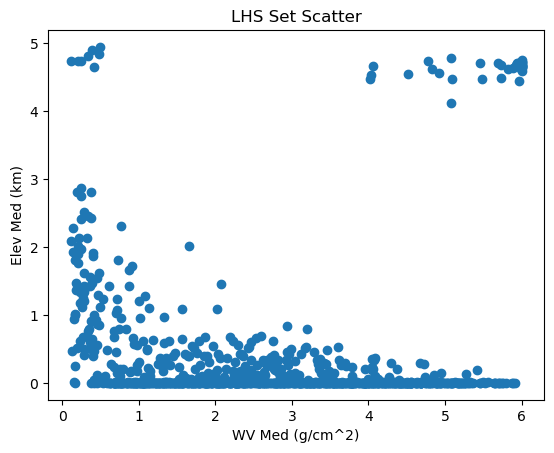

In [14]:
plt.scatter(lhs_samples['wv med'], lhs_samples['elev med'])
plt.xlabel('WV Med (g/cm^2)')
plt.ylabel('Elev Med (km)')
plt.title('LHS Set Scatter')

Text(0.5, 1.0, 'LHS Set Scatter')

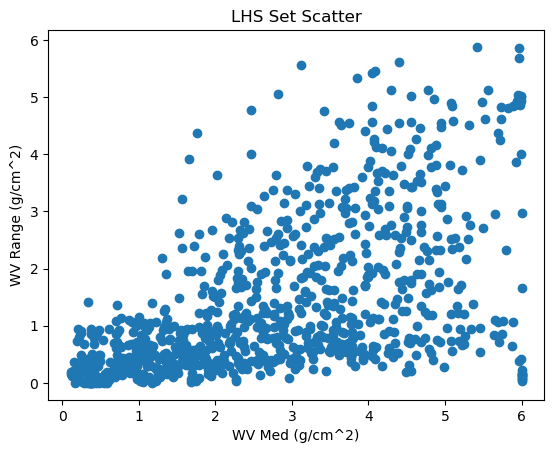

In [15]:
plt.scatter(lhs_samples['wv med'], lhs_samples['wv range'])
plt.xlabel('WV Med (g/cm^2)')
plt.ylabel('WV Range (g/cm^2)')
plt.title('LHS Set Scatter')

In [16]:
#np.savetxt('../../FIDs_wvmed_sza_925.txt', lhs_fids, fmt='%s')